In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
X = np.load(os.getcwd() + '/processed_data/proc_X.npy', allow_pickle=True)
y = np.load(os.getcwd() + '/processed_data/proc_y.npy', allow_pickle=True)

In [7]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [8]:
model = load_model(os.getcwd() + '/models/best_initial_model.h5')
preds = model.predict(X)
preds = np.argmax(preds, axis=1)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-12-12 22:25:59.479809: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-12 22:25:59.480305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-12-12 22:25:59.649201: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-12 22:25:59.652092: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-12 22:25:59.710185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [9]:
preds_dec = le.inverse_transform(preds)
cm = confusion_matrix(y, preds_dec)
cm_df = pd.DataFrame(cm, index=[l for l in le.classes_], columns=[l for l in le.classes_])

Accuracy:  0.710650723025584


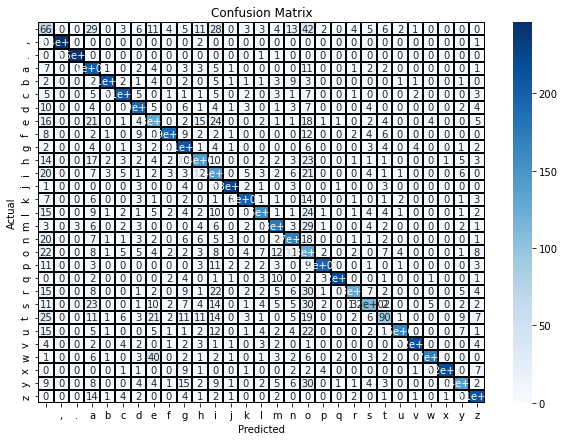

In [10]:
print('Accuracy: ', accuracy_score(y, preds_dec))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, linewidths=2, linecolor='black', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# print the per class accuracies
accuracies = []
for i in range(len(le.classes_)):
    accuracy = cm[i, i] / np.sum(cm[i, :])
    accuracies.append(accuracy)
print('Per class accuracies: ', list(zip(le.classes_, accuracies)))

Per class accuracies:  [(' ', 0.2661290322580645), (',', 0.9879032258064516), ('.', 0.9919354838709677), ('a', 0.8266129032258065), ('b', 0.842741935483871), ('c', 0.8306451612903226), ('d', 0.7782258064516129), ('e', 0.5080645161290323), ('f', 0.7661290322580645), ('g', 0.8467741935483871), ('h', 0.5725806451612904), ('i', 0.5766129032258065), ('j', 0.9274193548387096), ('k', 0.7983870967741935), ('l', 0.6330645161290323), ('m', 0.7137096774193549), ('n', 0.6814516129032258), ('o', 0.5241935483870968), ('p', 0.7943548387096774), ('q', 0.875), ('r', 0.5080645161290323), ('s', 0.4637096774193548), ('t', 0.3629032258064516), ('u', 0.6532258064516129), ('v', 0.8790322580645161), ('w', 0.6935483870967742), ('x', 0.8830645161290323), ('y', 0.5685483870967742), ('z', 0.8548387096774194)]
